# **8. 고급 인공신경망의 구현**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **8.14 학습데이터에만 최적화된 신경망 개선하기 : 드롭아웃**

**drop-out 확인**

In [8]:
import numpy as np
data = np.arange(1, 11).reshape(2, 5).astype(np.float32)
print(data)

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [9]:
import tensorflow as tf
layer = tf.keras.layers.Dropout(.3, input_shape = (2, ))
outputs = layer(data, training=True)
print(outputs)

tf.Tensor(
[[ 1.4285715  2.857143   4.285714   5.714286   7.1428576]
 [ 8.571428  10.        11.428572   0.        14.285715 ]], shape=(2, 5), dtype=float32)


In [10]:
##### 8.5 절의 코드 활용
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255 # 입력값 정규화

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:

# 드롭아웃 계층을 가진 신경망 모델 만들기
model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape = (28, 28)),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(10, activation = 'softmax'),
])

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10,
                    validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6072 - loss: 1.1178 - val_accuracy: 0.9383 - val_loss: 0.2246
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9025 - loss: 0.3772 - val_accuracy: 0.9504 - val_loss: 0.1796
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9186 - loss: 0.3176 - val_accuracy: 0.9582 - val_loss: 0.1568
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9274 - loss: 0.2840 - val_accuracy: 0.9583 - val_loss: 0.1526
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9352 - loss: 0.2485 - val_accuracy: 0.9638 - val_loss: 0.1376
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9371 - loss: 0.2400 - val_accuracy: 0.9638 - val_loss: 0.1313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9391 - loss: 0.2325 - val_accuracy: 0.9656 - val_loss: 0.1291
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9427 - loss: 0.2

<Axes: >

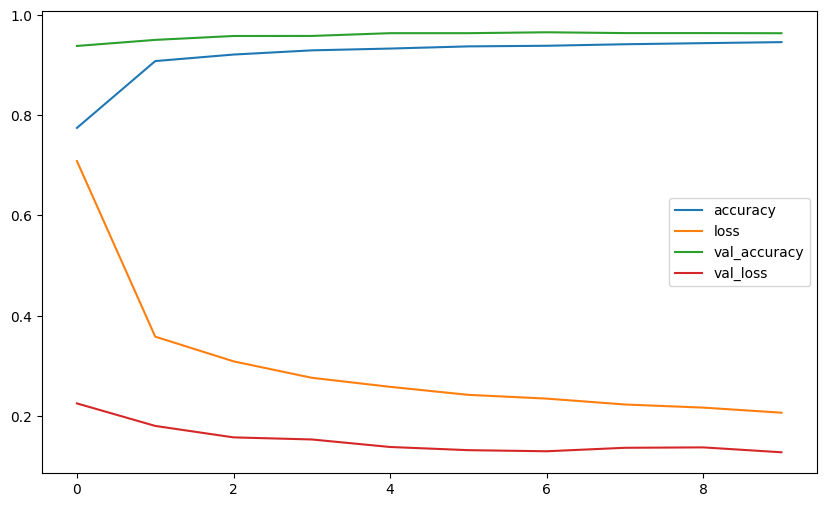

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))